'This model is scored at 0.7528327936582646 in range (0,1)'

"For a car with this parameters {'wt': [2.5]} it predicts 23.923947235535348 mpg."

/home/lumenn/Code/home-lab-notes/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/lumenn/Code/home-lab-notes/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/lumenn/Code/home-lab-notes/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/lumenn/Code/home-lab-notes/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/lumenn/Code/home-lab-notes/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted w

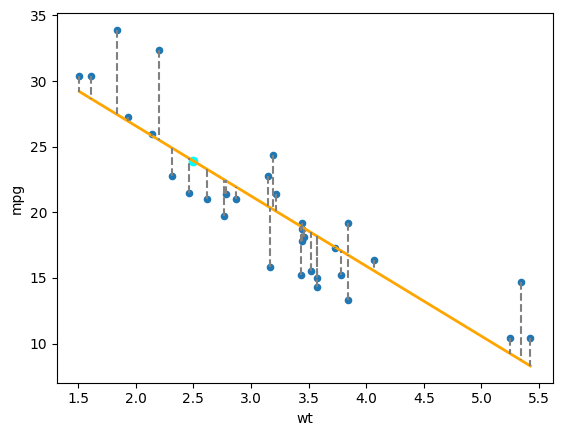

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv = pd.read_csv('mtcars.csv')
X = csv[['wt']] # Features
y = csv[['mpg']] # Target

regression = LinearRegression().fit(X, y)

predict = {
  'wt': [2.50]
}

prediction_result = regression.predict(pd.DataFrame(predict))[0][0]
y_pred = regression.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

display(f'This model have R2 = {regression.score(X, y)} in range (0,1)')
display(f'This model have MSE = {mse}')
display(f'This model have RMSE = {rmse}')

display(f'For a car with this parameters {predict} '
        f'it predicts {prediction_result} mpg.')

ax = csv.plot.scatter(x='wt', y='mpg')
x_range = np.linspace(X.min(), X.max(), 100) # 100 evenly spaced values from min to max of hp
y_range = regression.predict(x_range)

  
ax.plot(x_range, y_range, color='orange', linewidth=2)
ax.scatter(predict['wt'], prediction_result, color='cyan')

for i in range(len(csv)):
	wt = csv['wt'][i]
	mpg = csv['mpg'][i]
	predicted_mpg = regression.predict([[wt]])[0][0]
	ax.plot([wt, wt], [mpg, predicted_mpg], color='gray', linestyle='--')


	
plt.show()